In [ ]:
from sklearn.cross_validation import train_test_split

import pandas as pd

df = pd.DataFrame({
    'x1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y': [11, 12, 13, 14, 15, 16, 17, 18, 19]
})

df.head()

x = df['x1']
y = df['y']

x_train, y_train, x_test, y_test = train_test_split(x, y)
print "x_train", x_train
print "y_train", y_train
print "x_test", x_test
print "y_test", y_test

#df = df.head(1000)
#df = df.drop(...)


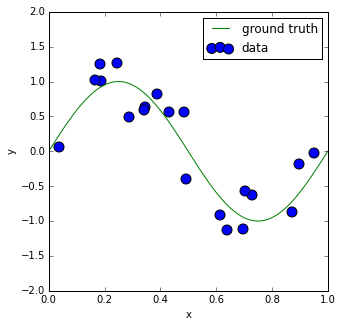

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from IPython.core.pylabtools import figsize

figsize(5,5)

np.random.seed(9)

# A simple sinusoidal function, not a linear function
def f(x):
    return np.sin(2 * np.pi * x)

# generate points along x used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100

# if we did not use random.uniform the points would lie on the sinisdial function
# but we want randomness to see the error from our input value
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]

y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

fig, axes = plt.subplots(1,1)

axes.plot(x_plot, f(x_plot), label='ground truth', color='green')
axes.scatter(X_train, y_train, label='data', s=100)
axes.set_ylim((-2, 2))
axes.set_xlim((0, 1))
axes.set_ylabel('y')
axes.set_xlabel('x')
axes.legend();





In [11]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ''est'' on axis ''ax''. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X_train, y_train, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

In [7]:
# x_plot is just a range of your values, 100 values ranging betwenn 0 and 1
#x_plot.shape gives you 100 rows in undefined collumns
# x_plot.np.newaccess gives you 100 rows in 1 column, b/c panads expects a matrix but we were giving 
# it a vector
x_plot[:, np.newaxis].shape

(100, 1)

In [ ]:
x_plot[:, np.newa

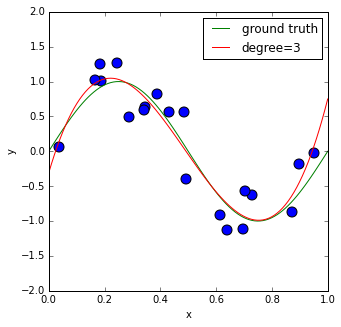

In [20]:
fig,ax = plt.subplots(1,1)
degree = 3


# Step 1: Transform my input into a polynomial feature spaces:

# Example Input
#       X = [1, 3, 4, 2, 3]
#
# Example output:
# 
# array([[ 1,  1,  1],
#       [ 1,  3,  9],
#       [ 1,  4, 16],
#       [ 1,  2,  4],
#       [ 1,  3,  9]])

# Step 2: Apply Linear Regression
# When calling make_pipeline all we are doing is chaining thoes two steps into a single step
# we have degree = 1, it isnt applying and transorming the data yet, if we increase the degree
# you get a fit that is quadratic, cubic.. ect.
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# what fit is doing is just building my model, it is determining the coefficients that fit the model
est.fit(X_train, y_train)
plot_approximation(est, ax, label='degree=%d' % degree)

# Plot the fit of a polynomial of degree 2, 3, and 9.
# a degree 3 is a pretty good fit (better r-squared), degree 9 fits the data well but it is overfitting our model,
# b/c its a high ordered polynomial it goes to infinity, in sample error is low out of sample error is high
# 
#x_poly_features = PolynomialFeatures(degree=2)
#x_poly_features.fit_transform(x)

# X_train[:5]
# x = [1, 3, 4, 2, 3]

# print type(x)
# print type(np.array(x))

# converting from a simple list to a numpy array
# x = np.array(x)
# x = x[:, np.newaxis]
# print(x.shape)

# we transported our vector so that it fits the format we are looking for
# took x and turned it into polynomial features, which we are going to to our regression on
# Now we are regressing on the features that make up a line we are regressing on the features
# that make up a polynomial

# We want to minimize the cost function and maximise the fit of our poly model on our training set
# how well my model generalizes to observations that i have not seen,
# we need a low r squard on our testing data and training set aswell - cross validation
# as little error as posible on observations that I have not yet seen
# green line is what our data was generated from and the red line should be as closs to that as possable
# problem is we are spliting the data so we dont have all the data
# 30% training 70% fitting
#

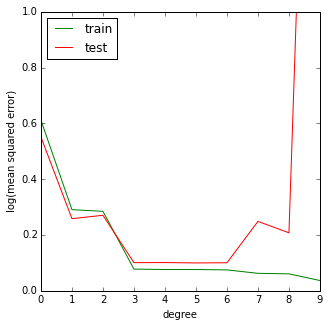

In [24]:
# What polynomial should we choose?
from sklearn.metrics import mean_squared_error

degrees=10

train_error = np.empty(degrees)
test_error = np.empty(degrees)
for degree in range(degrees):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

# Simplist model that explains that data is the best model
